We are exploring areas in Africa, attacked by desert locust swarms based on this cv [documnet](https://github.com/OmdenaAI/KenyaRedCross/blob/main/Data/locust_hub_data/Swarms.csv)

- Convert the csv file to geoJson
- Get the areas within Kenya only
- Save the file


In [60]:
import pandas as pd

In [61]:
data = pd.read_csv('C:/Users/rasha/Documents/Jupyter/Swarms.csv')
data.head()

,Unnamed: 0,X,Y,OBJECTID,STARTDATE,TmSTARTDAT,FINISHDATE,TmFINISHDA,EXACTDATE,PARTMONTH,...,CTLQTYU,CTLARTREA,CTLARTREAU,CTLAPPHAND,CTLAPPVEHI,CTLAPPAIR,CTLAPPMECH,CTLAPPUNK,CTLESTKILL,CAT
0,0,-15.131944,17.870278,1,1985-11-30,12:00,1985-11-30,12:00,No,Late,...,,0.0,,0,0,0,0,0,0,Swarm
1,1,-15.400278,18.030833,2,1985-11-26,12:00,1985-11-26,12:00,No,Late,...,,0.0,,0,0,0,0,0,0,Swarm
2,2,-14.668889,17.988889,3,1985-11-27,12:00,1985-11-27,12:00,No,Late,...,,0.0,,0,0,0,0,0,0,Swarm
3,3,-14.633333,17.835833,4,1985-11-30,12:00,1985-11-30,12:00,No,Late,...,,0.0,,0,0,0,0,0,0,Swarm
4,4,-13.353889,18.026389,5,1985-10-15,12:00,1985-10-15,12:00,Yes,,...,,0.0,,0,0,0,0,0,0,Swarm


In [62]:
'''# Let's make sure the date columns are in date format
data = data.to_csv('C:/Users/rasha/Documents/Jupyter/Swarms.csv', date_format='%Y-%m-%d')
data = pd.read_csv('C:/Users/rasha/Documents/Jupyter/Swarms.csv')
data.head()
data['STARTDATE'] = pd.to_datetime(data['STARTDATE'], format='%Y-%m-%d')
data['FINISHDATE'] = pd.to_datetime(data['FINISHDATE'], format='%Y-%m-%d')'''

"# Let's make sure the date columns are in date format\ndata = data.to_csv('C:/Users/rasha/Documents/Jupyter/Swarms.csv', date_format='%Y-%m-%d')\ndata = pd.read_csv('C:/Users/rasha/Documents/Jupyter/Swarms.csv')\ndata.head()\ndata['STARTDATE'] = pd.to_datetime(data['STARTDATE'], format='%Y-%m-%d')\ndata['FINISHDATE'] = pd.to_datetime(data['FINISHDATE'], format='%Y-%m-%d')"

In [63]:
# Select relevent date
start_date = '2019/11/30'
end_date = '2020/11/30'
mask = (data['STARTDATE'] > start_date) & (data['FINISHDATE'] <= end_date)

In [64]:
data_latest_attacks = data.loc[mask]

In [65]:
data_latest_attacks['STARTDATE']

24615    2020-01-24
24616    2020-01-25
24617    2020-01-25
24618    2020-01-25
24619    2020-01-25
            ...    
31587    2020-11-04
31588    2020-11-04
31589    2020-11-04
31590    2020-11-05
31591    2020-11-05
Name: STARTDATE, Length: 6977, dtype: object

In [66]:
print(f"We have {len(data_latest_attacks)} attacks from {start_date} to {end_date} world wide")

We have 6977 attacks from 2019/11/30 to 2020/11/30 world wide


In [67]:
# Conver csv to geojson
from shapely.geometry import Point
import geopandas as gpd
# creating a geometry column 
geometry = [Point(xy) for xy in zip(data_latest_attacks['X'], data_latest_attacks['Y'])]
# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(data_latest_attacks, crs=crs, geometry=geometry)

C:\Users\rasha\.conda\envs\omdena_malaria\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [68]:
gdf = gdf.to_crs("EPSG:4326")

<AxesSubplot:>

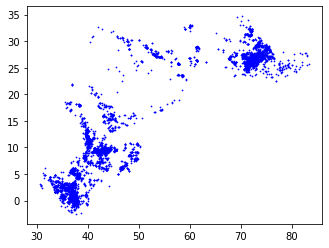

In [69]:
# Plot all points
gdf.plot(marker='o', color='b', markersize=0.5)

As we can see above these point cover the whole world. We'll try to get the ones within Kenya for example using a geojson for Kenya counties and perform a spatial join.

In [70]:
kenya_counties = gpd.read_file('C:/Users/rasha/Documents/Jupyter/kenyan-counties.geojson')
# make sure that both have the same projection system
kenya_counties = kenya_counties.to_crs("EPSG:4326")

In [71]:
hub_data_kenya = gpd.sjoin(gdf, kenya_counties, op="within")

<AxesSubplot:>

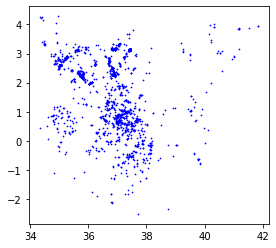

In [72]:
# Plot all points
hub_data_kenya.plot(marker='o', color='b', markersize=0.5)

In [73]:
hub_data_kenya.head()

,Unnamed: 0,X,Y,OBJECTID_left,STARTDATE,TmSTARTDAT,FINISHDATE,TmFINISHDA,EXACTDATE,PARTMONTH,...,geometry,index_right,OBJECTID_right,AREA,PERIMETER,COUNTY3_,COUNTY3_ID,COUNTY,Shape_Leng,Shape_Area
24675,24675,37.350000,1.033333,24676,2020-01-27,08:57,2020-01-27,08:57,No,Late,...,POINT (37.35000 1.03333),5,6,1.713,8.311,7,6,Samburu,8.311013,1.713014
24676,24676,37.600000,0.683333,24677,2020-01-27,09:45,2020-01-27,09:45,No,Late,...,POINT (37.60000 0.68333),5,6,1.713,8.311,7,6,Samburu,8.311013,1.713014
24677,24677,37.433333,1.350000,24678,2020-01-27,11:06,2020-01-27,11:06,No,Late,...,POINT (37.43333 1.35000),5,6,1.713,8.311,7,6,Samburu,8.311013,1.713014
24678,24678,37.300000,0.866667,24679,2020-01-27,11:11,2020-01-27,11:11,No,Late,...,POINT (37.30000 0.86667),5,6,1.713,8.311,7,6,Samburu,8.311013,1.713014
24682,24682,37.666667,0.800000,24683,2020-01-27,11:59,2020-01-27,11:59,No,Late,...,POINT (37.66667 0.80000),5,6,1.713,8.311,7,6,Samburu,8.311013,1.713014


In [74]:
print(f"We have {len(hub_data_kenya)} attacks from {start_date} to {end_date} world wide")

We have 2168 attacks from 2019/11/30 to 2020/11/30 world wide


Awesome now we got our data! Let's save it as a geojson

In [77]:
hub_data_kenya.to_file("D:/hub_data_kenya_latest_attacks.geojson", driver='GeoJSON')

Now we can use the file to get images from GEE!

In [78]:
test = gpd.read_file("D:/hub_data_kenya_latest_attacks.geojson")

In [79]:
test.head()


,Unnamed: 0,X,Y,OBJECTID_left,STARTDATE,TmSTARTDAT,FINISHDATE,TmFINISHDA,EXACTDATE,PARTMONTH,...,index_right,OBJECTID_right,AREA,PERIMETER,COUNTY3_,COUNTY3_ID,COUNTY,Shape_Leng,Shape_Area,geometry
0,24675,37.350000,1.033333,24676,2020-01-27,08:57:00,2020-01-27,08:57:00,No,Late,...,5,6,1.713,8.311,7,6,Samburu,8.311013,1.713014,POINT (37.35000 1.03333)
1,24676,37.600000,0.683333,24677,2020-01-27,09:45:00,2020-01-27,09:45:00,No,Late,...,5,6,1.713,8.311,7,6,Samburu,8.311013,1.713014,POINT (37.60000 0.68333)
2,24677,37.433333,1.350000,24678,2020-01-27,11:06:00,2020-01-27,11:06:00,No,Late,...,5,6,1.713,8.311,7,6,Samburu,8.311013,1.713014,POINT (37.43333 1.35000)
3,24678,37.300000,0.866667,24679,2020-01-27,11:11:00,2020-01-27,11:11:00,No,Late,...,5,6,1.713,8.311,7,6,Samburu,8.311013,1.713014,POINT (37.30000 0.86667)
4,24682,37.666667,0.800000,24683,2020-01-27,11:59:00,2020-01-27,11:59:00,No,Late,...,5,6,1.713,8.311,7,6,Samburu,8.311013,1.713014,POINT (37.66667 0.80000)
